# **Experiment #1**: Epoch length

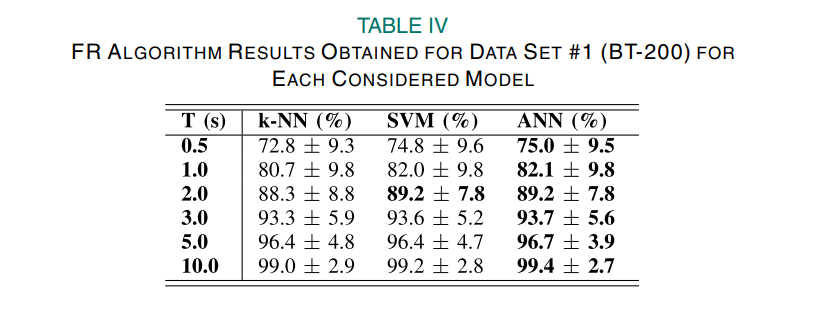

In [1]:
import mne

# Utility
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
# Scikit-learn and Pyriemann ML functionalities
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedShuffleSplit
from pyriemann.estimation import Covariances, ERPCovariances, XdawnCovariances
from pyriemann.spatialfilters import CSP
from pyriemann.tangentspace import TangentSpace
from pyriemann.classification import MDM

from utilities import read_xdf, epoching

### **Load Data**

In [2]:
DATA = dict()

T = {0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 10.0} # epoch period in second

In [3]:
filenames = {'Pipo_1_5_test1.xdf', 'Pipo_1_5_test2.xdf', 'Pipo_1_5_test3.xdf'}

for tmax in T:

    X, F, t, y = [],[],[],[]
    for filename in filenames:

        raw = read_xdf(filename, show_plot=False, show_psd=False, bandpass=(4.0, 12.0))

        epochs = epoching(raw, show_psd=False,
            show_eeg=False,    # set True if wanna see preview of all epoch
            tmax=tmax)         # tmax=5 means set epoch duration 5 second

        # Pick only event 2: Left stimuli, 5: Right stimuli
        epochs = epochs['2','5']

        X.append((  epochs.get_data() * 1e6)[:,:,:int( tmax*250 )]) # 250 is record sampling rate
        t.append((  epochs.times)[:int( tmax*250 )]) # 250 is record sampling rate          
        F.append(   epochs.compute_psd(
            method='welch', 
            fmax=30,
            n_per_seg=len(epochs.times)
            
            # raise ValueError(('If n_per_seg is None n_fft is not allowed to be > ''n_times. 
            # If you want zero-padding, you have to set ''n_per_seg to relevant length. Got n_fft of %d while'' signal length is %d.') % (n_fft, n))

            # n_fft : int
            #     The length of FFT used, must be ``>= n_per_seg`` (default: 256).
            #     The segments will be zero-padded if ``n_fft > n_per_seg``.
            # n_per_seg : int | None
            #     Length of each Welch segment. The smaller it is with respect to the
            #     signal length the smoother are the PSDs. Defaults to None, which sets
            #     n_per_seg equal to n_fft.
            ).get_data())
        y.append(   epochs.events[:, -1])

    # Concatenate all data
    X = np.concatenate(X)
    F = np.concatenate(F)
    t = np.concatenate(t)
    y = np.concatenate(y)

    DATA[str(tmax)] = (X, F, t, y)

Creating RawArray with float64 data, n_channels=8, n_times=52020
    Range : 0 ... 52019 =      0.000 ...   208.006 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)


c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 126 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


Creating RawArray with float64 data, n_channels=8, n_times=50520
    Range : 0 ... 50519 =      0.000 ...   201.994 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 126 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s)

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=49650
    Range : 0 ... 49649 =      0.000 ...   198.521 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 126 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s)

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=52020
    Range : 0 ... 52019 =      0.000 ...   208.006 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 251 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s)

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=50520
    Range : 0 ... 50519 =      0.000 ...   201.994 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 251 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s)

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=49650
    Range : 0 ... 49649 =      0.000 ...   198.521 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 251 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s)

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=52020
    Range : 0 ... 52019 =      0.000 ...   208.006 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 501 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s)

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=50520
    Range : 0 ... 50519 =      0.000 ...   201.994 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 501 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s)

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=49650
    Range : 0 ... 49649 =      0.000 ...   198.521 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 501 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s)

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=52020
    Range : 0 ... 52019 =      0.000 ...   208.006 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 751 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s)

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=50520
    Range : 0 ... 50519 =      0.000 ...   201.994 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 751 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s)

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=49650
    Range : 0 ... 49649 =      0.000 ...   198.521 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 751 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s)

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=52020
    Range : 0 ... 52019 =      0.000 ...   208.006 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1001 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=50520
    Range : 0 ... 50519 =      0.000 ...   201.994 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1001 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=49650
    Range : 0 ... 49649 =      0.000 ...   198.521 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1001 original time points ...
1 bad epochs dropped
Effective window size : 1.024 (s

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=52020
    Range : 0 ... 52019 =      0.000 ...   208.006 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1251 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=50520
    Range : 0 ... 50519 =      0.000 ...   201.994 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1252 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=49650
    Range : 0 ... 49649 =      0.000 ...   198.521 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1251 original time points ...
1 bad epochs dropped
Effective window size : 1.024 (s

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=52020
    Range : 0 ... 52019 =      0.000 ...   208.006 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 2502 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=50520
    Range : 0 ... 50519 =      0.000 ...   201.994 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 2502 original time points ...
1 bad epochs dropped
Effective window size : 1.024 (s

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=49650
    Range : 0 ... 49649 =      0.000 ...   198.521 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 2502 original time points ...
1 bad epochs dropped
Effective window size : 1.024 (s

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

In [4]:
print("DATA:", DATA.keys())

for key in DATA.keys():
    X, F, t, y = DATA[key]
    print(f"T={key} :", X.shape, F.shape, t.shape, y.shape)

DATA: dict_keys(['0.5', '1.0', '2.0', '3.0', '4.0', '5.0', '10.0'])
T=0.5 : (48, 5, 125) (48, 5, 31) (375,) (48,)
T=1.0 : (48, 5, 250) (48, 5, 31) (750,) (48,)
T=2.0 : (48, 5, 500) (48, 5, 31) (1500,) (48,)
T=3.0 : (48, 5, 750) (48, 5, 31) (2250,) (48,)
T=4.0 : (48, 5, 1000) (48, 5, 31) (3000,) (48,)
T=5.0 : (48, 5, 1250) (48, 5, 31) (3750,) (48,)
T=10.0 : (48, 5, 2500) (48, 5, 31) (7500,) (48,)


## **Cross-validation**

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from tqdm.auto import tqdm


Epoch length(T)=0.5
 CSP + RegLDA    :Standard error=0.027, Mean=0.526, Max=0.251, Min=-0.221
 Cov + TS        :Standard error=0.027, Mean=0.506, Max=0.244, Min=-0.311
 Cov + MDM       :Standard error=0.028, Mean=0.517, Max=0.233, Min=-0.239
 CSP + Cov + TS  :Standard error=0.042, Mean=0.526, Max=0.307, Min=-0.526

Epoch length(T)=1.0
 CSP + RegLDA    :Standard error=0.025, Mean=0.689, Max=0.283, Min=-0.161
 Cov + TS        :Standard error=0.033, Mean=0.664, Max=0.308, Min=-0.303
 Cov + MDM       :Standard error=0.024, Mean=0.651, Max=0.182, Min=-0.151
 CSP + Cov + TS  :Standard error=0.033, Mean=0.676, Max=0.324, Min=-0.287

Epoch length(T)=2.0
 CSP + RegLDA    :Standard error=0.016, Mean=0.833, Max=0.139, Min=-0.111
 Cov + TS        :Standard error=0.017, Mean=0.835, Max=0.137, Min=-0.140
 Cov + MDM       :Standard error=0.016, Mean=0.832, Max=0.113, Min=-0.138
 CSP + Cov + TS  :Standard error=0.016, Mean=0.838, Max=0.135, Min=-0.115

Epoch length(T)=3.0
 CSP + RegLDA    :Standard e

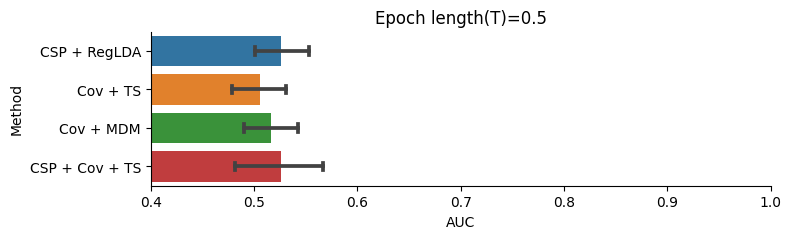

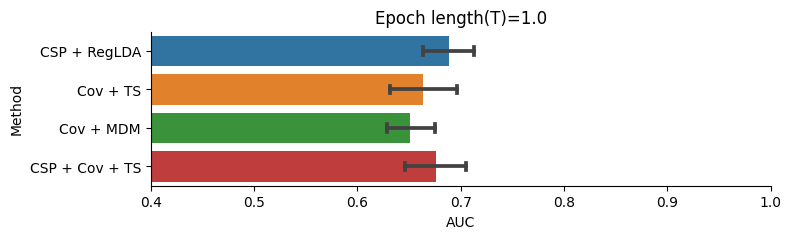

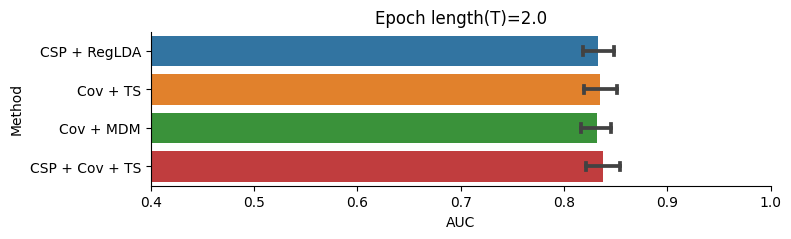

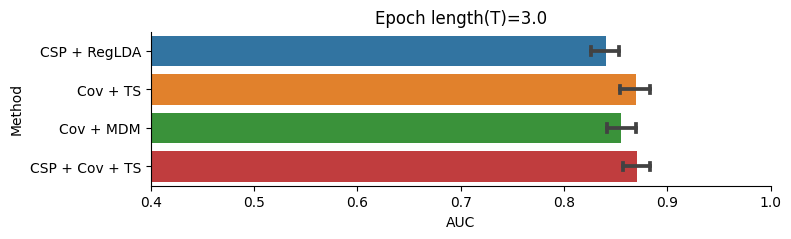

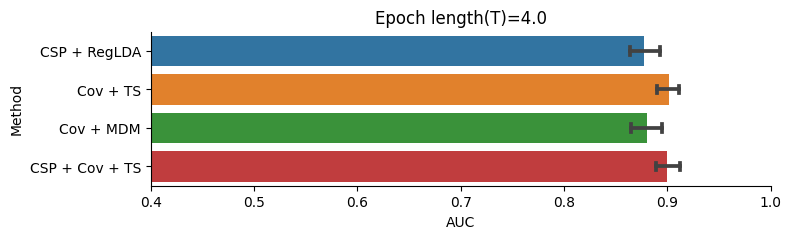

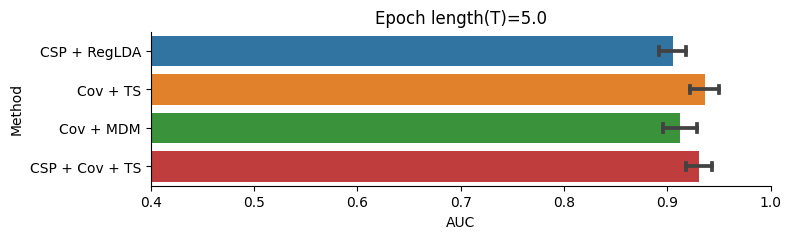

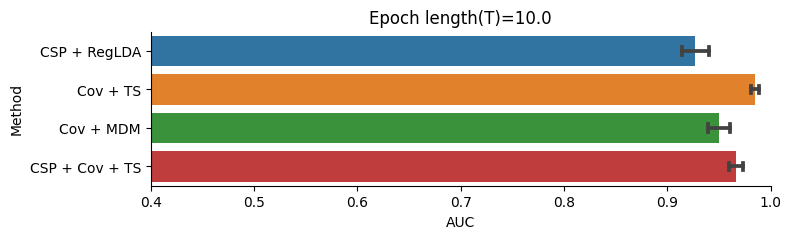

In [6]:
RESULTS = pd.DataFrame()

for key in DATA.keys():
    X, F, t, y = DATA[key]

    # Next, we will use 4 different machine learning pipelines to classify the SSVEP based on the data we collected. The

    # - CSP + RegLDA : Common Spatial Patterns + Regularized Linear Discriminat Analysis. This is a very common EEG analysis pipeline.
    # - Cov + TS : Covariance + Tangent space mapping. One of the most reliable Riemannian geometry-based pipelines.
    # - Cov + MDM: Covariance + MDM. A very simple, yet effective (for low channel count), Riemannian geometry classifier.
    # - CSP + Cov + TS: Common Spatial Patterns + Covariance + Tangent spacem mapping. Riemannian pipeline with the standard CSP procedure beforehand

    # Evaluation is done through cross-validation, with area-under-the-curve (AUC) as metric (AUC is probably the best metric for binary and unbalanced classification problem)

    # Note: because we're doing machine learning here, the following cell may take a while to complete

    clfs = OrderedDict()
    clfs['CSP + RegLDA'] = make_pipeline(Covariances(), CSP(4), LDA(shrinkage='auto', solver='eigen'))
    clfs['Cov + TS'] = make_pipeline(Covariances(), TangentSpace(), LogisticRegression())
    clfs['Cov + MDM'] = make_pipeline(Covariances(), MDM())
    clfs['CSP + Cov + TS'] = make_pipeline(Covariances(), CSP(4, log=False), TangentSpace(), LogisticRegression())

    # define cross validation
    cv = StratifiedShuffleSplit(n_splits=20, test_size=0.25, random_state=42)

    print(f"\nEpoch length(T)={key}")

    # run cross validation for each pipeline
    auc = []
    methods = []
    for m in clfs:
        # print(m)
        try:
            res = cross_val_score(clfs[m], X, y, scoring='roc_auc',cv=cv, n_jobs=-1)
            auc.extend(res)
            methods.extend([m]*len(res))

            # calculate 
            mean = np.mean(res)
            standard_error = np.std(res, ddof=1) / np.sqrt(np.size(res))
            print(f" {m:16}:Standard error={standard_error:.3f}, Mean={mean:.3f}, Max={max(res)-mean:.3f}, Min={min(res)-mean:.3f}")
            # print(f" {m:16}:Standard error={standard_error:.3f}, Mean={np.mean(res):.3f}")

        except:
            pass

    results = pd.DataFrame(data=auc, columns=['AUC'])
    results['Method'] = methods
    results['T'] = float(key)

    RESULTS = pd.concat([RESULTS, results])
    # display(results)

    fig = plt.figure(figsize=[8, 2])
    sns.barplot(data=results, x='AUC', y='Method', capsize=.2, 
        errorbar=('ci', 68),
        # default ci=95 is ~1.96 standard errors, and ci=68 is ~1 standard error
    )
    plt.xlim(0.4, 1)
    plt.title(f"Epoch length(T)={key}")
    sns.despine()

In [7]:
# Build model
import keras
from keras.models import Model
from keras.layers import  Input, Dense,Dropout, Conv1D, MaxPooling1D, Flatten,BatchNormalization
from keras.optimizers import Adam
from keras import backend as K  

class CNNModel(Model):
    def __init__(self, inputsize=1250):
        super().__init__()

        # Input layer shape
        self.inputshape = (5, inputsize)

        # Parameters
        self.bath_size = 4
        self.train_epochs = 5
        self.upper_threshold = 0.8
        self.lower_threshold = 0.2

        # Define layers
        self.conv1_layer1 = Conv1D(filters=128, kernel_size=3, activation='relu')
        self.bath_norm_layer1 =BatchNormalization(name='batch_norm_layer1')
        self.maxpool_layer1 = MaxPooling1D(2, name='maxpool_layer1')
        self.dropout_layer1 = Dropout(0.2, name='dropout_layer1')
        self.dense_layer1 = Dense(64, activation='relu', name='dense_layer1')
        self.fatten_layer1 = Flatten(name='fatten_layer1')
        self.dropout_layer2 = Dropout(0.2, name='dropout_layer2')
        self.dense_layer2 = Dense(32, activation='relu', name='dense_layer2')
        self.output_layer = Dense(1, activation='sigmoid', name='output_layer')

        # Get model
        self.model = self.get_model()

    def get_model(self):

        # Define input
        input_layer = Input(shape=self.inputshape, name='input_layer')

        # Model layers
        x = self.conv1_layer1(input_layer)
        x = self.bath_norm_layer1(x)
        x = self.maxpool_layer1(x)
        x = self.dropout_layer1(x)
        x = self.dense_layer1(x)
        x = self.fatten_layer1(x)
        x = self.dropout_layer2(x)
        x = self.dense_layer2(x)
        output_layer = self.output_layer(x)

        # Model
        model = Model(inputs=input_layer, outputs=output_layer, name='CNNModel')
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

 60%|██████    | 3/5 [00:00<00:00,  7.99it/s]WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _update_step_xla while saving (showing 2 of 2). These functions will not be directly callable after loading.


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpjtcy_oyn\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpjtcy_oyn\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp3go2_wuk\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp3go2_wuk\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpdyrqxsim\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpdyrqxsim\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmputo1wkc9\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmputo1wkc9\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpq3xaa53q\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpq3xaa53q\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpd96v_j88\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpd96v_j88\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmprgovt5cj\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmprgovt5cj\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpqffh7268\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpqffh7268\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpb7h7s4t3\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpb7h7s4t3\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpjye6go84\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpjye6go84\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpoam7qq83\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpoam7qq83\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpcy6vt4b8\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpcy6vt4b8\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp_ezvif6p\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp_ezvif6p\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp9t5_t_i5\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp9t5_t_i5\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpm5z_ktb9\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpm5z_ktb9\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpfo448dsv\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpfo448dsv\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpk8ipotu7\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpk8ipotu7\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpwaekfka4\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpwaekfka4\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp1ok0_z0z\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp1ok0_z0z\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpf7p_wt73\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpf7p_wt73\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp4thu3j0o\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp4thu3j0o\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmptfd8suxf\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmptfd8suxf\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpcj_i43vf\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpcj_i43vf\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpgr6ovpl6\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpgr6ovpl6\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp1wjtnluf\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp1wjtnluf\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmphuwwremc\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmphuwwremc\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpeturfgja\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpeturfgja\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpsyz1p692\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpsyz1p692\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp083c_2e4\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp083c_2e4\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp3h8lsa0i\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp3h8lsa0i\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpaifcgyk6\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpaifcgyk6\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpwdf0zohs\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpwdf0zohs\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpvg7p_5d7\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpvg7p_5d7\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpgb5g5_li\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpgb5g5_li\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmprj4wg_6n\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmprj4wg_6n\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp1jis5w2i\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp1jis5w2i\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp7rm4taf5\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp7rm4taf5\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpeplp4c0f\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpeplp4c0f\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp1ltqvxz_\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp1ltqvxz_\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpz0kd1gb1\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpz0kd1gb1\assets
100%|██████████| 5/5 [01:34<00:00, 18.86s/it]


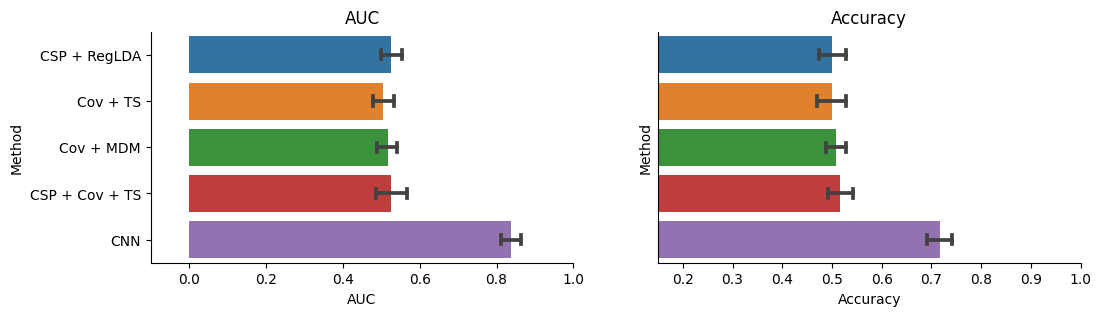

 80%|████████  | 4/5 [00:00<00:00,  7.56it/s]

INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp4qztakrs\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp4qztakrs\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpd27rgxzi\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpd27rgxzi\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmplh9ekp9i\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmplh9ekp9i\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpnj1vcrvw\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpnj1vcrvw\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp_pm5ele5\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp_pm5ele5\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp4gkfze1h\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp4gkfze1h\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpxqky9lyp\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpxqky9lyp\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpecgk9mu0\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpecgk9mu0\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpls3n0nby\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpls3n0nby\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp_g3oxqbu\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp_g3oxqbu\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpy1cmd3zf\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpy1cmd3zf\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpbvkn59k2\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpbvkn59k2\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp8qj6ixt9\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp8qj6ixt9\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmppcxykvag\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmppcxykvag\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp5uarn6_z\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp5uarn6_z\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp7qp6ill9\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp7qp6ill9\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpxs0pst5q\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpxs0pst5q\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpqn_rh20_\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpqn_rh20_\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpo1zezofz\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpo1zezofz\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpmj9kjx85\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpmj9kjx85\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp314jjofa\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp314jjofa\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp3dvy5ab8\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp3dvy5ab8\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpv69prs1t\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpv69prs1t\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpj7w01ppd\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpj7w01ppd\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpau5jhcan\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpau5jhcan\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpwvk7n2n0\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpwvk7n2n0\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpw46ulux8\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpw46ulux8\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpr3itzjmu\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpr3itzjmu\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp74yx5hmq\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp74yx5hmq\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpkzijrxqo\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpkzijrxqo\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpz5sxjhh0\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpz5sxjhh0\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpuu1o5zqq\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpuu1o5zqq\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmppahhiiu5\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmppahhiiu5\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp944m1no4\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp944m1no4\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp57t7o5fo\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp57t7o5fo\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpq878zfhz\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpq878zfhz\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpooo6bmad\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpooo6bmad\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpvka16fmt\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpvka16fmt\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpwhm8grsy\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpwhm8grsy\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp7vgh9mdu\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp7vgh9mdu\assets
100%|██████████| 5/5 [01:22<00:00, 16.53s/it]


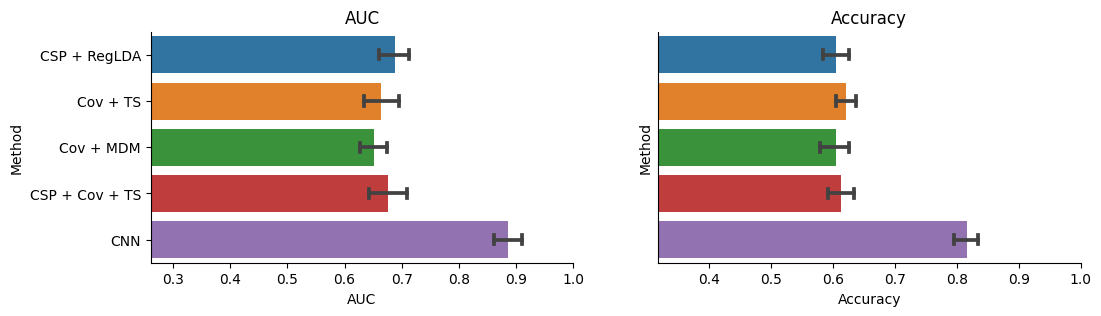

 80%|████████  | 4/5 [00:00<00:00,  8.34it/s]

INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp8j3bdaky\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp8j3bdaky\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpfkkicijf\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpfkkicijf\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpp_c2m1fd\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpp_c2m1fd\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp0d6chw2w\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp0d6chw2w\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpe0yry2f2\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpe0yry2f2\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpq44k758u\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpq44k758u\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp56sjjdtt\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp56sjjdtt\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp68fcmldh\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp68fcmldh\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmptv9nrx6v\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmptv9nrx6v\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpptwm_gqp\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpptwm_gqp\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpzyhghpq_\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpzyhghpq_\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpdic2qujb\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpdic2qujb\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp7e01xj5v\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp7e01xj5v\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpgzrft2z6\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpgzrft2z6\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpb840ijou\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpb840ijou\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp4qpuun5u\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp4qpuun5u\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpz72sej8h\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpz72sej8h\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp9w1mvjdb\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp9w1mvjdb\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpcofrmzi2\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpcofrmzi2\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmprxs4eci4\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmprxs4eci4\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpry9o_ads\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpry9o_ads\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpv492hyj3\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpv492hyj3\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmprcacpu2y\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmprcacpu2y\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp90xiwae1\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp90xiwae1\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpmtsh_fbp\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpmtsh_fbp\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp_2app9xq\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp_2app9xq\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpc6mkf698\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpc6mkf698\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpgu6jdocd\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpgu6jdocd\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpvv7ybncm\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpvv7ybncm\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmptyd845ag\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmptyd845ag\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpcgrf1g_q\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpcgrf1g_q\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp32rs5b3b\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp32rs5b3b\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp0qw49vy5\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp0qw49vy5\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpuytibri7\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpuytibri7\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpofpmldcl\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpofpmldcl\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp_p9jgf2_\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp_p9jgf2_\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpjx97zp9a\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpjx97zp9a\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpy4umgx66\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpy4umgx66\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp3je9e0o3\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp3je9e0o3\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpjdxx1rjb\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpjdxx1rjb\assets
100%|██████████| 5/5 [01:23<00:00, 16.62s/it]


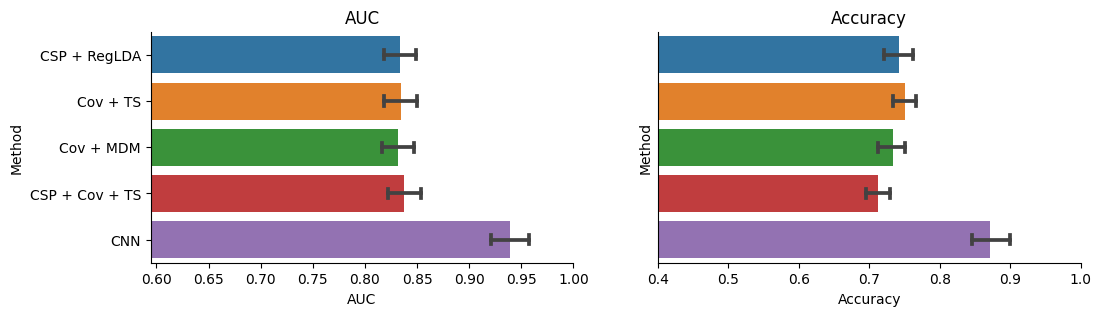

 80%|████████  | 4/5 [00:01<00:00,  3.86it/s]

INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpp3mvsw18\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpp3mvsw18\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmplqakzupn\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmplqakzupn\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp3i8srz3a\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp3i8srz3a\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmptnoognxq\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmptnoognxq\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp46ny5wbd\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp46ny5wbd\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpumfs17hk\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpumfs17hk\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpq5iwjv40\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpq5iwjv40\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp76xeg4fr\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp76xeg4fr\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpo_x4_qpr\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpo_x4_qpr\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp8dkv95rz\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp8dkv95rz\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpf5z8pf_n\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpf5z8pf_n\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp08u09wyh\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp08u09wyh\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpm11il6rd\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpm11il6rd\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpu3x_afsq\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpu3x_afsq\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpoykcrvy6\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpoykcrvy6\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp9n1gj993\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp9n1gj993\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpvv2f8p9f\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpvv2f8p9f\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpxoh0eje0\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpxoh0eje0\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmplnjonnxa\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmplnjonnxa\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp4eymfj0t\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp4eymfj0t\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpr07pykti\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpr07pykti\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpmfbiktn7\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpmfbiktn7\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpjtqeef5s\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpjtqeef5s\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmptejnzhz8\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmptejnzhz8\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpqr123oqz\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpqr123oqz\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp53pjilpv\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp53pjilpv\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmph64f71wx\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmph64f71wx\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpvfuth628\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpvfuth628\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpoqem0qki\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpoqem0qki\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpbgkude1o\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpbgkude1o\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpbo6jd38t\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpbo6jd38t\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpbheaydh4\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpbheaydh4\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp5oaxn3k0\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp5oaxn3k0\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp2o7gwtnh\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp2o7gwtnh\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp_06zktqo\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp_06zktqo\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpkmjaue29\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpkmjaue29\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpa9e85a_n\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpa9e85a_n\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp759da_py\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp759da_py\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpi2x1xbpx\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpi2x1xbpx\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpuggsg_zb\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpuggsg_zb\assets
100%|██████████| 5/5 [01:24<00:00, 16.97s/it]


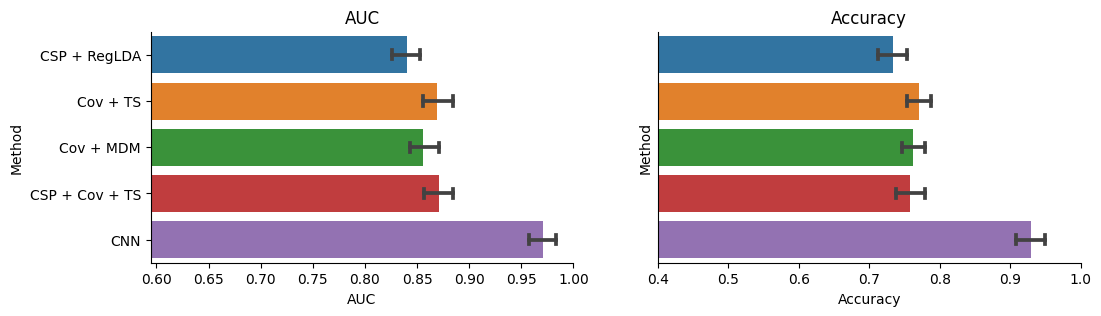

 80%|████████  | 4/5 [00:01<00:00,  3.52it/s]

INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpzb4ug_sp\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpzb4ug_sp\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpaf05wgjn\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpaf05wgjn\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp92gdsf7o\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp92gdsf7o\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpzbzjtam0\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpzbzjtam0\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpy5qneq_h\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpy5qneq_h\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp_b1526ri\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp_b1526ri\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp3kyi0s4f\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp3kyi0s4f\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpd2eg0bui\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpd2eg0bui\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpa1c0a8kw\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpa1c0a8kw\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpgzfq7j7a\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpgzfq7j7a\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp98ic1vff\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp98ic1vff\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpcv827wrh\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpcv827wrh\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpfqps7nhv\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpfqps7nhv\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpt5u2_3e2\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpt5u2_3e2\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpz7wyfhqv\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpz7wyfhqv\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmptjyu674z\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmptjyu674z\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp9xggae9p\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp9xggae9p\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp1yv_pg8d\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp1yv_pg8d\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp2_6o9rji\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp2_6o9rji\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpwxpq8xso\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpwxpq8xso\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpf68x2ak2\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpf68x2ak2\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmputkuhl44\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmputkuhl44\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpx51wz2jl\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpx51wz2jl\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpo0s8zegs\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpo0s8zegs\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp8r1zpqu1\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp8r1zpqu1\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpcdm1_cy1\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpcdm1_cy1\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp62r6yewc\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp62r6yewc\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpnou_n10t\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpnou_n10t\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp_sjqwl0x\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp_sjqwl0x\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpud3sbwns\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpud3sbwns\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpa97hkght\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpa97hkght\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmppy0rf0px\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmppy0rf0px\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpwdjlwv3g\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpwdjlwv3g\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpq7lblw8o\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpq7lblw8o\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp82xa9srn\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp82xa9srn\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpfou_1dw1\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpfou_1dw1\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpgblgvqmq\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpgblgvqmq\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpge4effho\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpge4effho\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpqv6y_5ni\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpqv6y_5ni\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpt4srnsak\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpt4srnsak\assets
100%|██████████| 5/5 [01:27<00:00, 17.58s/it]


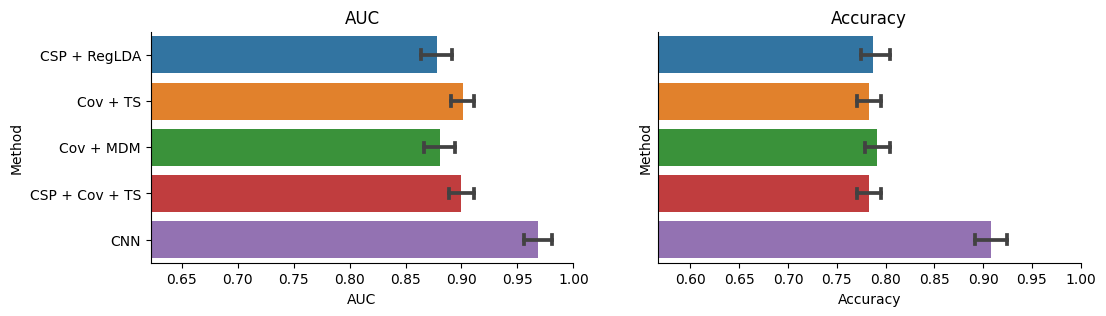

 80%|████████  | 4/5 [00:01<00:00,  3.46it/s]

INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpzasrhr9k\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpzasrhr9k\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpucivta5c\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpucivta5c\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp0_3481my\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp0_3481my\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpgq4mhic4\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpgq4mhic4\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpqmq20s7i\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpqmq20s7i\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpzpzhjc65\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpzpzhjc65\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp_a69ftgo\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp_a69ftgo\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp0qtmm9is\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp0qtmm9is\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpcum8tawt\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpcum8tawt\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpal4sfm_6\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpal4sfm_6\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpygx62tey\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpygx62tey\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpasjzkcwh\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpasjzkcwh\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp6qa4mrql\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp6qa4mrql\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpr_t8_xlf\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpr_t8_xlf\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp2rdxdrbs\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp2rdxdrbs\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpt61ehpn8\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpt61ehpn8\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmptkdi5mdz\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmptkdi5mdz\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpqosf6tlw\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpqosf6tlw\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp51qfnkh1\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp51qfnkh1\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp2s59z_17\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp2s59z_17\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmplhjvyd6r\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmplhjvyd6r\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpqk4ng4j9\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpqk4ng4j9\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpaf8j1ujq\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpaf8j1ujq\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpzajkztrm\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpzajkztrm\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp7qpoznjd\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp7qpoznjd\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp7qo4x12z\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp7qo4x12z\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpyglwojom\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpyglwojom\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpbjhjkqqj\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpbjhjkqqj\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpea2kf_tj\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpea2kf_tj\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmps9wv1_n4\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmps9wv1_n4\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp0zettymg\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp0zettymg\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp1u99t5r_\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp1u99t5r_\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpvravylkt\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpvravylkt\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp8ce3gt6k\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp8ce3gt6k\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp52iygd98\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp52iygd98\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpyaipgv3z\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpyaipgv3z\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpsisgrp1e\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpsisgrp1e\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpenn35flf\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpenn35flf\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpoc2zwyd6\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpoc2zwyd6\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp1qfdew2_\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp1qfdew2_\assets
100%|██████████| 5/5 [01:29<00:00, 17.89s/it]


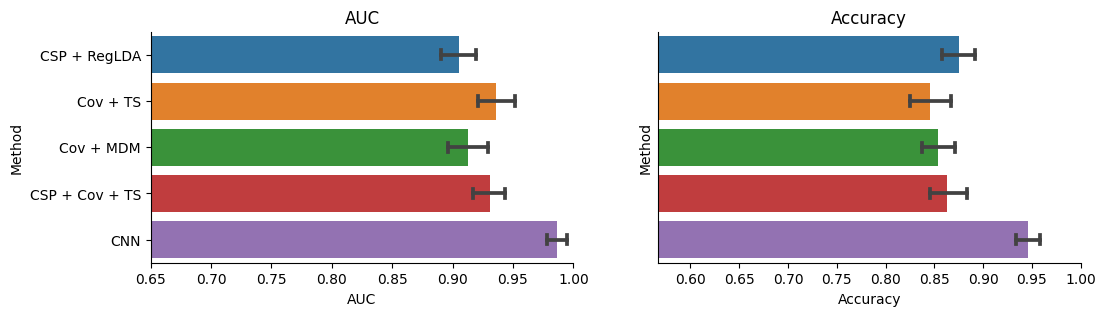

 80%|████████  | 4/5 [00:01<00:00,  2.40it/s]

INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpv0ombtdi\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpv0ombtdi\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpp7j0ghfz\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpp7j0ghfz\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpbtq0mb33\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpbtq0mb33\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpq_jxcnnx\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpq_jxcnnx\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp36dlpvlg\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp36dlpvlg\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmps5go7njs\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmps5go7njs\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmppdcnccer\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmppdcnccer\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpw8npre8h\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpw8npre8h\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp5ck_es0q\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp5ck_es0q\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpqt6r7mmm\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpqt6r7mmm\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpb405gb_v\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpb405gb_v\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpn6ect7nk\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpn6ect7nk\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmprasjgyov\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmprasjgyov\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpjzywmox8\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpjzywmox8\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpwxu_ha75\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpwxu_ha75\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpms8fl299\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpms8fl299\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp0pu7h0id\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp0pu7h0id\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp2kns70xy\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp2kns70xy\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmph_9cp0ap\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmph_9cp0ap\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpb5dn1yy3\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpb5dn1yy3\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmphn854ho0\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmphn854ho0\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp2no2qd9k\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp2no2qd9k\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpim3v3m8p\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpim3v3m8p\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpc55_t4ob\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpc55_t4ob\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp8d0inuvk\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp8d0inuvk\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpse8qzo1z\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpse8qzo1z\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpc9v67zsn\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpc9v67zsn\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpmx1m1u2t\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpmx1m1u2t\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpnt9n17a0\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpnt9n17a0\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpvgqk2b3c\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpvgqk2b3c\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpn645ojhp\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpn645ojhp\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpgelxa6kd\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpgelxa6kd\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp2nyueimp\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp2nyueimp\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp2vtirys5\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp2vtirys5\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpu960ce39\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpu960ce39\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp70966rcv\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp70966rcv\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpls8o8nm3\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpls8o8nm3\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp2_us35du\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp2_us35du\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpp8e94z23\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmpp8e94z23\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp2w3gxyv1\assets


INFO:tensorflow:Assets written to: C:\Users\seami\AppData\Local\Temp\tmp2w3gxyv1\assets
100%|██████████| 5/5 [01:41<00:00, 20.24s/it]


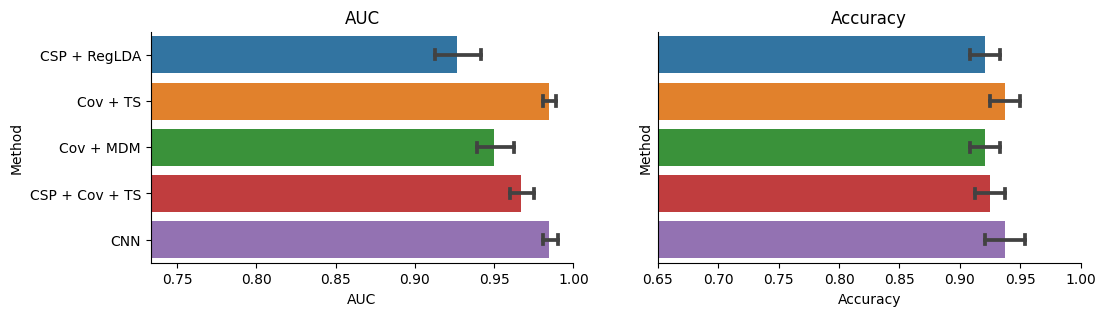

In [8]:
RESULTS = pd.DataFrame()

for key in DATA.keys():
    X, F, t, y = DATA[key]

    # Next, we will use 5 different machine learning pipelines to classify the SSVEP based on the data we collected. The

    # - CSP + RegLDA : Common Spatial Patterns + Regularized Linear Discriminat Analysis. This is a very common EEG analysis pipeline.
    # - Cov + TS : Covariance + Tangent space mapping. One of the most reliable Riemannian geometry-based pipelines.
    # - Cov + MDM: Covariance + MDM. A very simple, yet effective (for low channel count), Riemannian geometry classifier.
    # - CSP + Cov + TS: Common Spatial Patterns + Covariance + Tangent spacem mapping. Riemannian pipeline with the standard CSP procedure beforehand
    # - CNN: 

    # Evaluation is done through cross-validation, with area-under-the-curve (AUC) as metric (AUC is probably the best metric for binary and unbalanced classification problem)

    # Note: because we're doing machine learning here, the following cell may take a while to complete

    clfs = OrderedDict()
    clfs['CSP + RegLDA'] = make_pipeline(Covariances(), CSP(4), LDA(shrinkage='auto', solver='eigen'))
    clfs['Cov + TS'] = make_pipeline(Covariances(), TangentSpace(), LogisticRegression())
    clfs['Cov + MDM'] = make_pipeline(Covariances(), MDM())
    clfs['CSP + Cov + TS'] = make_pipeline(Covariances(), CSP(4, log=False), TangentSpace(), LogisticRegression())

    # from models import CNNModel
    from scikeras.wrappers import KerasClassifier

    CNN = CNNModel( inputsize=X.shape[-1] )
    clfs['CNN'] = KerasClassifier(model=CNN.get_model(), epochs=10, batch_size=8, verbose=0)

    # define cross validation
    cv = StratifiedShuffleSplit(n_splits=20, test_size=0.25,
                                            random_state=42)
    scoring = {'acc': 'accuracy',
            'auc': 'roc_auc'}

    # run cross validation for each pipeline
    acc,auc = [],[]
    methods = []
    for m in tqdm(clfs):
        # print(m)
        res = cross_validate(clfs[m], X, y, scoring=scoring, cv=cv, n_jobs=-1)
        # res = cross_val_score(clfs[m], X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
        '''res = {'fit_time': array([3.94812942, 3.98712373, 3.819134  , 3.88912916]),
                'score_time': array([0.53296137, 0.5869596 , 0.53796363, 0.6069591 ]),
                'test_acc': array([1.        , 0.95833333, 1.        , 1.        ]),
                'test_auc': array([1., 1., 1., 1.])}'''
        acc.extend(res['test_acc'])
        auc.extend(res['test_auc'])
        methods.extend([m]*len(res['score_time']))

    # res = cross_val_score(clfs_CNN, X, y, scoring='roc_auc',cv=cv, n_jobs=-1)
    # auc.extend(res)
    # methods.extend([m]*len(res))

    results = pd.DataFrame(data=auc, columns=['AUC'])
    results['Accuracy'] = acc
    results['Method'] = methods
    # -----------------------------------------------------------------------------------
    results['T'] = float(key)

    RESULTS = pd.concat([RESULTS, results])
    # display(results)

    fig, ax = plt.subplots(ncols=2, figsize=[12,3])
    sns.barplot(data=results, x='AUC', y='Method', capsize=.2, ax=ax[0],
            errorbar=('ci', 68),
            # default ci=95 is ~1.96 standard errors, and ci=68 is ~1 standard error
        )
    ax[0].set_xlim(0, 1); ax[0].set_title('AUC')
    sns.despine()

    # fig, ax = plt.subplot(2, figsize=[8,4])
    sns.barplot(data=results, x='Accuracy', y='Method', capsize=.2, ax=ax[1],
            errorbar=('ci', 68),
            # default ci=95 is ~1.96 standard errors, and ci=68 is ~1 standard error
        )
    ax[1].set_xlim(0, 1); ax[1].set_title('Accuracy'); ax[1].set_yticks([])
    sns.despine()
    plt.show()

### **Summary**

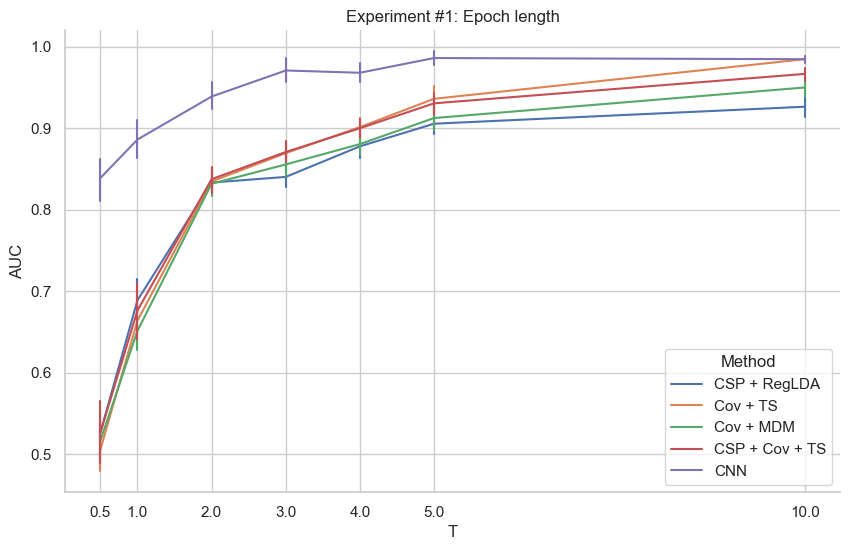

In [9]:
# RESULTS
sns.set_theme(style="whitegrid")
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Experiment #1: Epoch length")
ax.set_xticks(list(T))
# ax.set_xlim(0.4,10.2)

sns.lineplot(data=RESULTS, x='T', y='AUC', 
    hue='Method', 
    # style=
    # col="Method",
    markers=True,
    errorbar=("ci", 68), err_style="bars",
    ax=ax,
) # catplot
sns.despine()

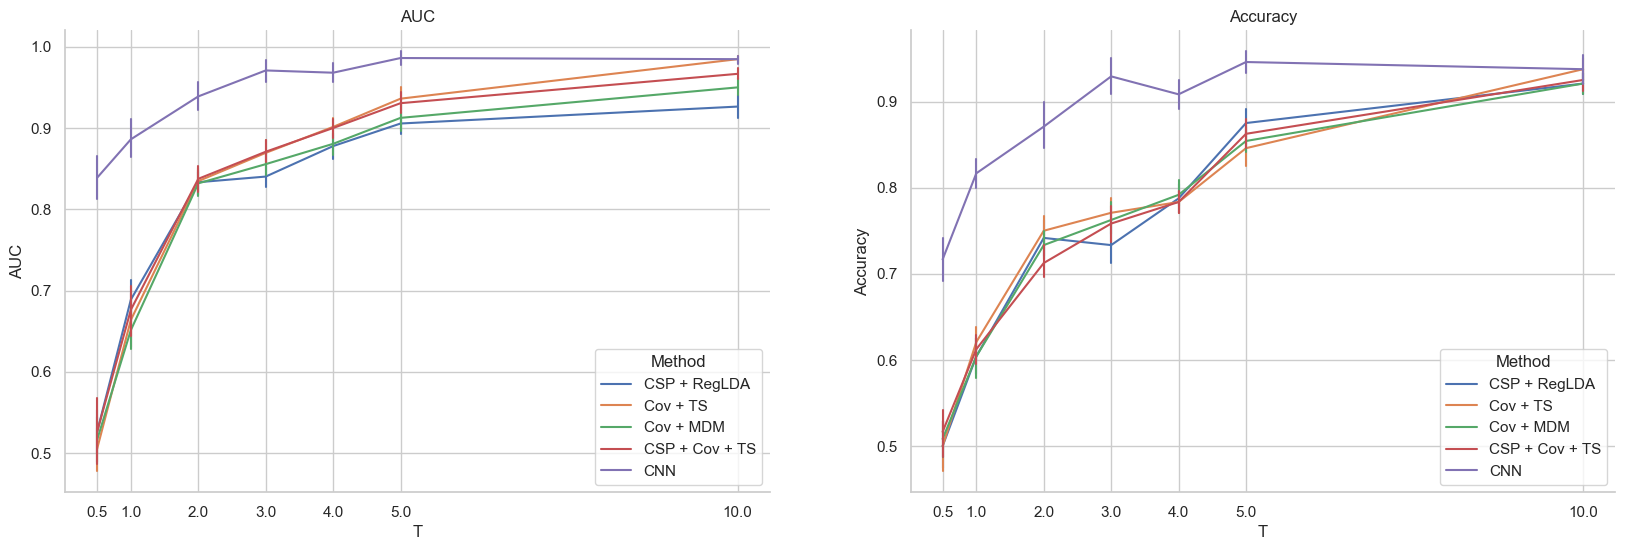

In [10]:
# RESULTS
sns.set_theme(style="whitegrid")
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(ncols=2, figsize=(20, 6))
# ax.set_xlim(0.4,10.2)

sns.lineplot(data=RESULTS, x='T', y='AUC', 
    hue='Method', 
    # style=
    # col="Method",
    markers=True,
    errorbar=("ci", 68), err_style="bars",
    ax=ax[0],
) # catplot
ax[0].set_title("AUC")
ax[0].set_xticks(list(T))
sns.despine()

sns.lineplot(data=RESULTS, x='T', y='Accuracy', 
    hue='Method', 
    # style=
    # col="Method",
    markers=True,
    errorbar=("ci", 68), err_style="bars",
    ax=ax[1],
) # catplot
ax[1].set_title("Accuracy")
ax[1].set_xticks(list(T))
sns.despine()

In [11]:
RESULTS

,AUC,Accuracy,Method,T
0,0.472222,0.416667,CSP + RegLDA,0.5
1,0.333333,0.250000,CSP + RegLDA,0.5
2,0.611111,0.583333,CSP + RegLDA,0.5
3,0.555556,0.583333,CSP + RegLDA,0.5
4,0.472222,0.416667,CSP + RegLDA,0.5
...,...,...,...,...
95,1.000000,0.916667,CNN,10.0
96,1.000000,1.000000,CNN,10.0
97,1.000000,1.000000,CNN,10.0
98,0.972222,0.916667,CNN,10.0
